In [599]:
import numpy as np
import matplotlib.pyplot as plt


num_pts = 40
num_pack = 1
num_wave = 1000

shift = 1*(np.random.rand(num_pack*num_wave,)-0.5)[:,np.newaxis]

x = np.linspace(-10,10,num=2*num_pts+1)[1:-1:2][np.newaxis,:]

def p(x, sigma, mu, mags):
    return mags*np.sin((x-mu)*sigmas)*(-9<x)*(x<9)

def px(x, sigma, mu, mags):
    return mags*sigmas*np.cos((x-mu)*sigmas)*(-9<x)*(x<9)

def pxx(x, sigma, mu, mags):
    return -mags*sigma**2*np.sin((x-mu)*sigmas)*(-9<x)*(x<9)

def pxxx(x, sigma, mu, mags):
    return -mags*sigma**3*np.cos((x-mu)*sigmas)*(-9<x)*(x<9)

def pxxxx(x, sigma, mu, mags):
    return mags*sigma**4*np.sin((x-mu)*sigmas)*(-9<x)*(x<9)

def pxxxxx(x, sigma, mu, mags):
    return mags*sigma**5*np.cos((x-mu)*sigmas)*(-9<x)*(x<9)

#sigmas = np.array([1.0]*num_pack*num_wave)[:,np.newaxis]
sigmas = (np.random.rand(num_pack*num_wave,)*2-1)[:,np.newaxis]
mus = (np.random.rand(num_pack*num_wave,)*10-5)[:,np.newaxis]
mags = ((np.random.rand(num_pack*num_wave,)-0.5)*10)[:,np.newaxis]


noise = 0.00

psi_r = np.mean(p(x,sigmas,mus,mags).reshape(num_pack, num_wave, num_pts), axis=0) + noise*np.random.randn(num_wave,num_pts)
psi_r_x = np.mean(px(x,sigmas,mus,mags).reshape(num_pack, num_wave, num_pts), axis=0) + noise*np.random.randn(num_wave,num_pts)
psi_r_xx = np.mean(pxx(x,sigmas,mus,mags).reshape(num_pack, num_wave, num_pts), axis=0) + noise*np.random.randn(num_wave,num_pts)
psi_r_xxx = np.mean(pxxx(x,sigmas,mus,mags).reshape(num_pack, num_wave, num_pts), axis=0) + noise*np.random.randn(num_wave,num_pts)
psi_r_xxxx = np.mean(pxxxx(x,sigmas,mus,mags).reshape(num_pack, num_wave, num_pts), axis=0) + noise*np.random.randn(num_wave,num_pts)

#sigmas2 = np.array([1.0]*num_pack*num_wave)[:,np.newaxis]
sigmas2 = (np.random.rand(num_pack*num_wave,)*2-1)[:,np.newaxis]
mus2 = (np.random.rand(num_pack*num_wave,)*6-3)[:,np.newaxis]
mags2 = ((np.random.rand(num_pack*num_wave,)-0.5)*10)[:,np.newaxis]

psi_i = np.mean(p(x,sigmas2,mus2,mags2).reshape(num_pack, num_wave, num_pts), axis=0) + noise*np.random.randn(num_wave,num_pts)
psi_i_x = np.mean(px(x,sigmas2,mus2,mags2).reshape(num_pack, num_wave, num_pts), axis=0) + noise*np.random.randn(num_wave,num_pts)
psi_i_xx = np.mean(pxx(x,sigmas2,mus2,mags2).reshape(num_pack, num_wave, num_pts), axis=0) + noise*np.random.randn(num_wave,num_pts)
psi_i_xxx = np.mean(pxxx(x,sigmas2,mus2,mags2).reshape(num_pack, num_wave, num_pts), axis=0) + noise*np.random.randn(num_wave,num_pts)
psi_i_xxxx = np.mean(pxxxx(x,sigmas2,mus2,mags2).reshape(num_pack, num_wave, num_pts), axis=0) + noise*np.random.randn(num_wave,num_pts)

k = 0

noise2 = 0.00

f_r = -psi_i_xx + k*(psi_r**2+psi_i**2)*psi_i + noise2*np.random.randn(num_wave,num_pts)
f_i = psi_r_xx - k*(psi_r**2+psi_i**2)*psi_r + noise2*np.random.randn(num_wave,num_pts)
f_r_x = -1/2*psi_i_xxx + 2*k*(psi_r*psi_r_x+psi_i*psi_i_x)*psi_i + k*(psi_r*2+psi_i**2)*psi_i_x + noise2*np.random.randn(num_wave,num_pts)
f_i_x = 1/2*psi_r_xxx - 2*k*(psi_r*psi_r_x+psi_i*psi_i_x)*psi_r - k*(psi_r**2+psi_i**2)*psi_r_x + noise2*np.random.randn(num_wave,num_pts)
f_r_xx = -1/2*psi_i_xxxx + 2*k*(psi_r_x**2+psi_r*psi_r_xx+psi_i_x**2+psi_i*psi_i_xx)*psi_i + 4*k*(psi_r*psi_r_x+psi_i*psi_i_x)*psi_i_x+k*(psi_r**2+psi_i**2)*psi_i_xx + noise2*np.random.randn(num_wave,num_pts)
f_i_xx = 1/2*psi_r_xxxx - 2*k*(psi_r_x**2+psi_r*psi_r_xx+psi_i_x**2+psi_i*psi_i_xx)*psi_r-4*k*(psi_r*psi_r_x+psi_i*psi_i_x)*psi_r-k*(psi_r**2+psi_i**2)*psi_r_xx + noise2*np.random.randn(num_wave,num_pts)



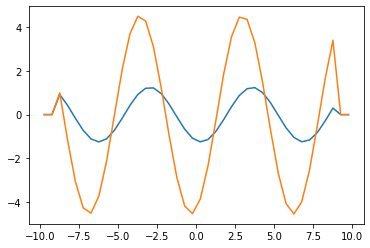

In [600]:
iid = 100
plt.plot(x[0], psi_r[iid])
plt.plot(x[0], psi_i[iid])

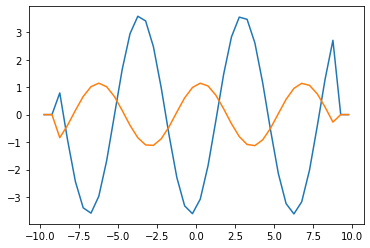

In [601]:
plt.plot(x[0], f_r[iid])
plt.plot(x[0], f_i[iid])

In [602]:
import copy

# data so wierd. The insensitivy problem? Relate to Gaussian?
eps = 1e-16

indices = np.linspace(-2,2,num=101)
losses = []
for i in range(indices.shape[0]):
    f = np.concatenate([f_r,f_i], axis=1)
    f_norm = f/(np.linalg.norm(f,axis=1)[:,np.newaxis]+eps)
    #psi = np.concatenate([psi_r,psi_i], axis=1)
    norm = np.sqrt(psi_r**2+psi_i**2) + eps
    psi = np.concatenate([psi_r*norm**indices[i],psi_i*norm**indices[i]], axis=1)
    psi_norm = psi/(np.linalg.norm(psi,axis=1)[:,np.newaxis]+eps)

    mul = np.sum(f_norm*psi_norm, axis=1)
    losses.append(copy.deepcopy(np.mean(mul**2)))

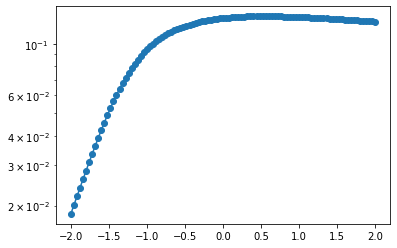

In [603]:
plt.plot(indices,losses, marker="o")
plt.yscale('log')

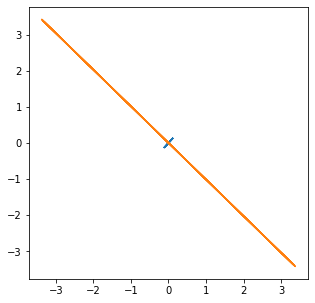

In [604]:
plt.figure(figsize=(5,5))
iid = 2
plt.plot(f_r[iid], psi_i[iid])
plt.plot(f_i[iid], psi_r[iid])